In [1]:
import os
os.chdir("..")

from pprint import pprint
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from tuxai.dataset import Dataset, Columns
from tuxai.misc import config_logger
from tuxai.report import model_metrics, Report

config_logger()

# MAPE for each version and target

## compute all possible combinations

In [2]:
from tuxai.misc import cache
c = cache()
key = "xgboost_model_2022_12_13"
if key in c:
    df = c[key]
else:
    report = Report()
    df = report.xgboost_model()
    c[key] = df
df

,version,collinearity,target,mean absolute error,mean absolute percentage error,mean squared error,max error,root mean squared error
0,4.13,False,vmlinux,3.761330,0.070124,120.686722,333.272064,10.985751
1,4.13,True,vmlinux,3.766622,0.070230,120.744183,333.272064,10.988366
2,4.13,False,GZIP-vmlinux,0.486908,0.043388,0.663211,18.932877,0.814378
3,4.13,True,GZIP-vmlinux,0.491091,0.043633,0.671779,18.932877,0.819621
4,4.13,False,BZIP2-vmlinux,0.482383,0.031313,0.734056,25.423183,0.856771
...,...,...,...,...,...,...,...,...
93,5.08,True,XZ-vmlinux,0.546813,0.042948,0.890337,16.119846,0.943577
94,5.08,False,LZO-vmlinux,0.889055,0.049329,2.275258,23.368984,1.508396
95,5.08,True,LZO-vmlinux,0.894649,0.049740,2.293461,23.522942,1.514418
96,5.08,False,LZ4-vmlinux,0.984672,0.050494,2.926528,28.907814,1.710710


## Display all MAPE for 4.13

In [3]:
cols = ["version", "collinearity", "target", "mean absolute percentage error"]
#df_413 = df[df.version == "4.13"][cols]#.set_index(cols[:2])
df_413 = df[df.version == "4.13"][cols]
df_413

,version,collinearity,target,mean absolute percentage error
0,4.13,False,vmlinux,0.070124
1,4.13,True,vmlinux,0.070230
2,4.13,False,GZIP-vmlinux,0.043388
3,4.13,True,GZIP-vmlinux,0.043633
4,4.13,False,BZIP2-vmlinux,0.031313
5,4.13,True,BZIP2-vmlinux,0.031609
6,4.13,False,LZMA-vmlinux,0.039646
7,4.13,True,LZMA-vmlinux,0.039929
8,4.13,False,XZ-vmlinux,0.039539
9,4.13,True,XZ-vmlinux,0.040168


## Compare MAPE for each target vs version

[Text(0.5, 1.0, 'MAPE')]

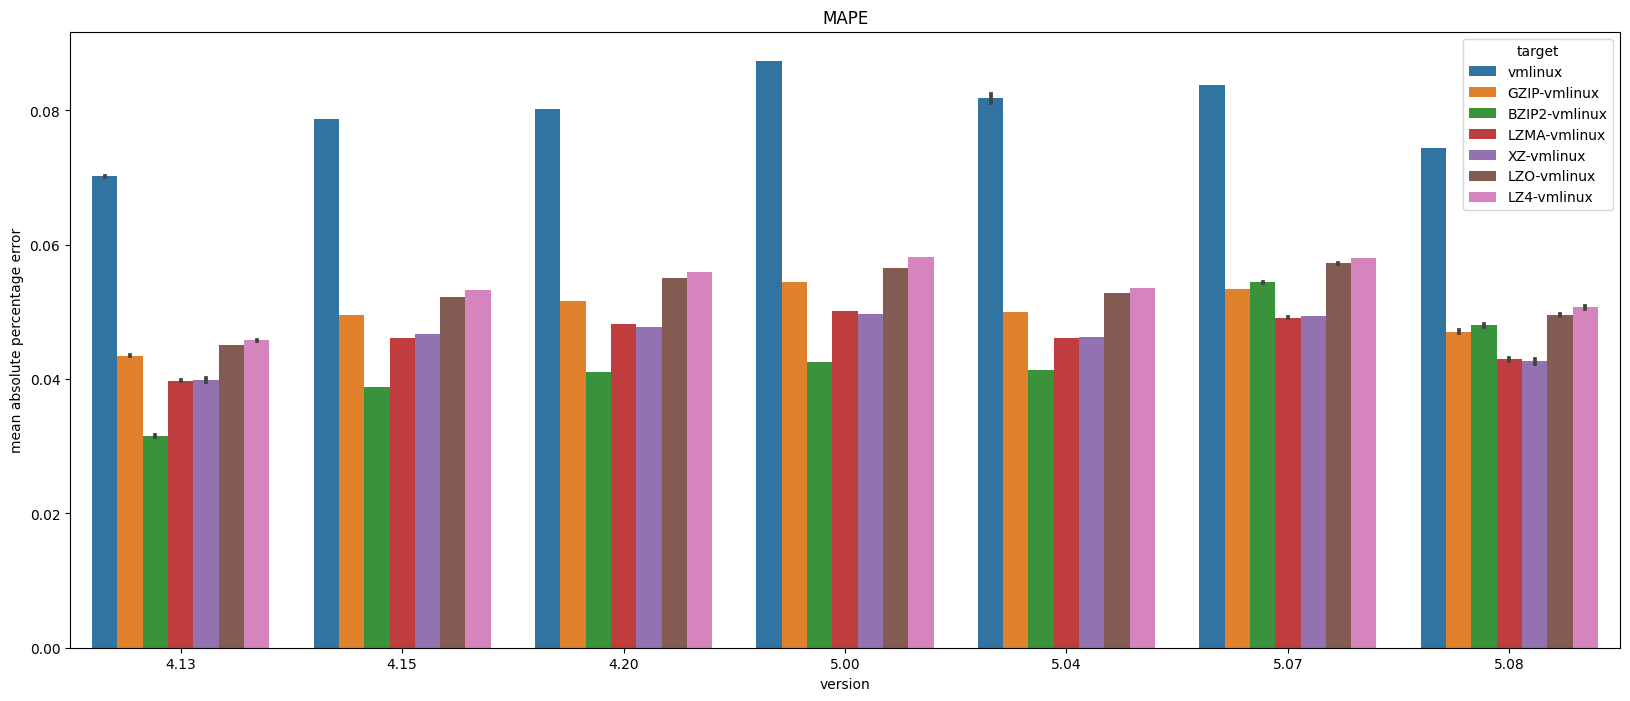

In [4]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df, x="version", y="mean absolute percentage error", hue="target").set(title='MAPE')

[Text(0.5, 1.0, 'MAPE')]

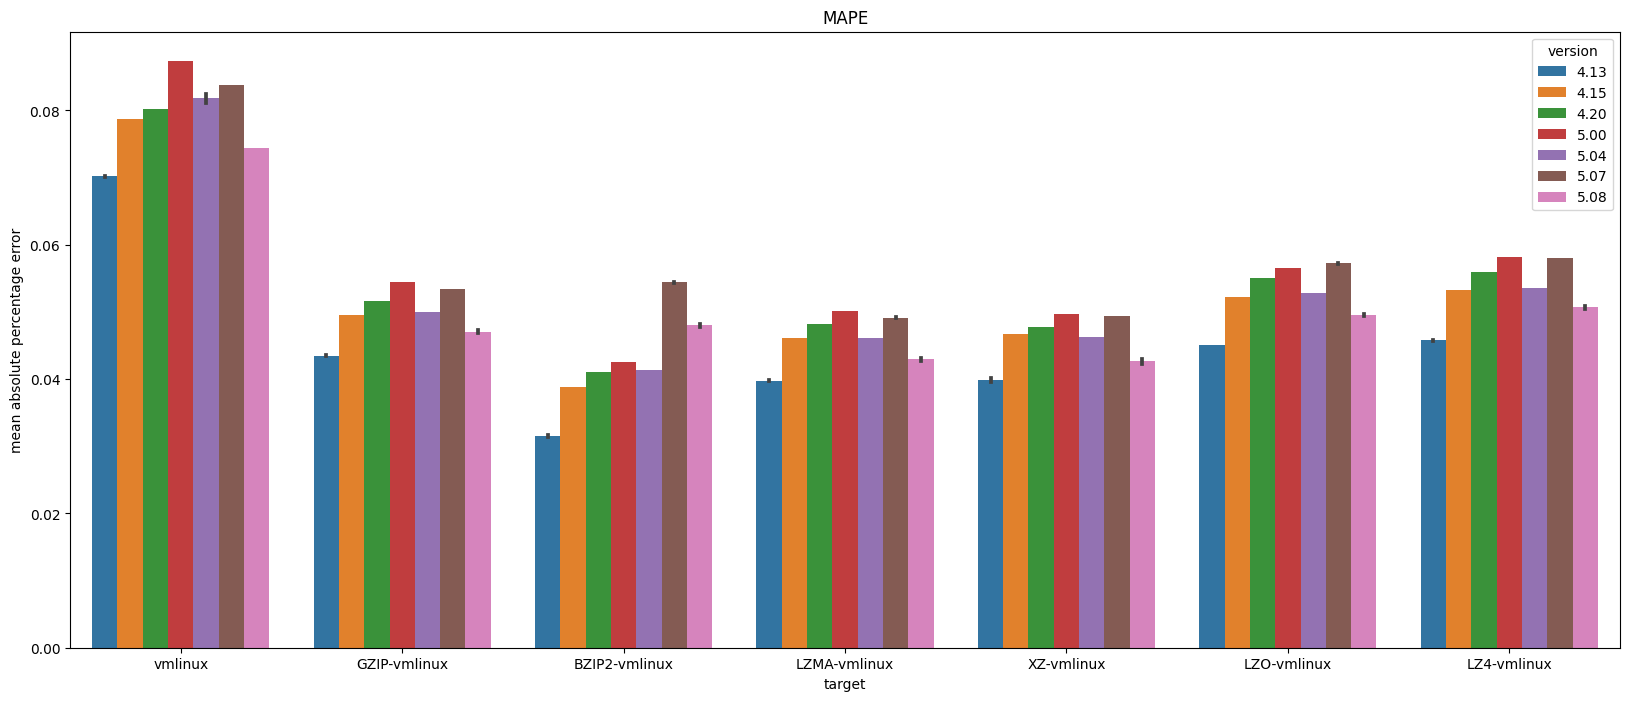

In [5]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df, x="target", y="mean absolute percentage error", hue="version").set(title='MAPE')

## Collinearity has a limited impact on MAPE, using XgBoost

[Text(0.5, 1.0, 'MAPE')]

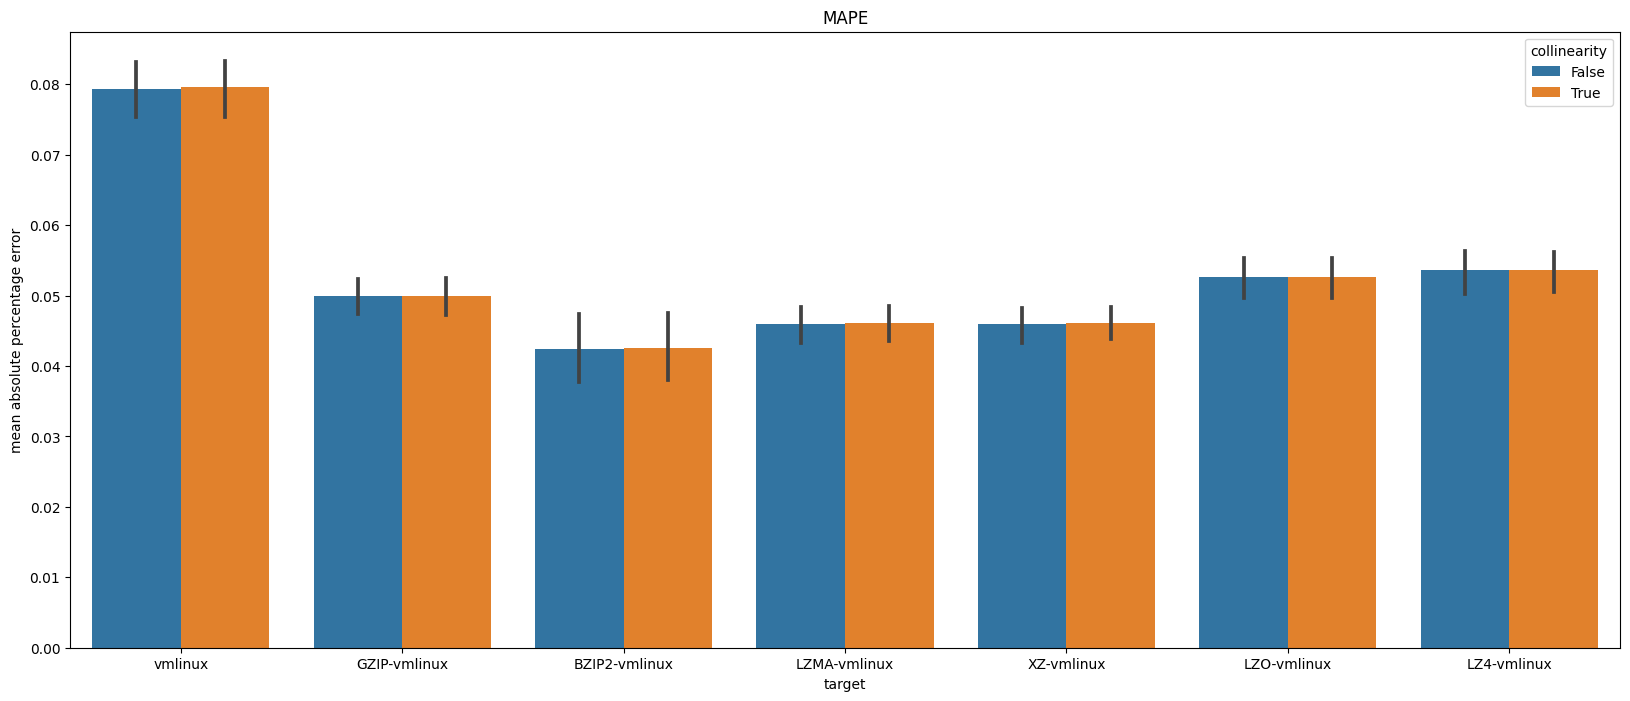

In [6]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df, x="target", y="mean absolute percentage error", hue="collinearity").set(title='MAPE')

[Text(0.5, 1.0, 'MAPE')]

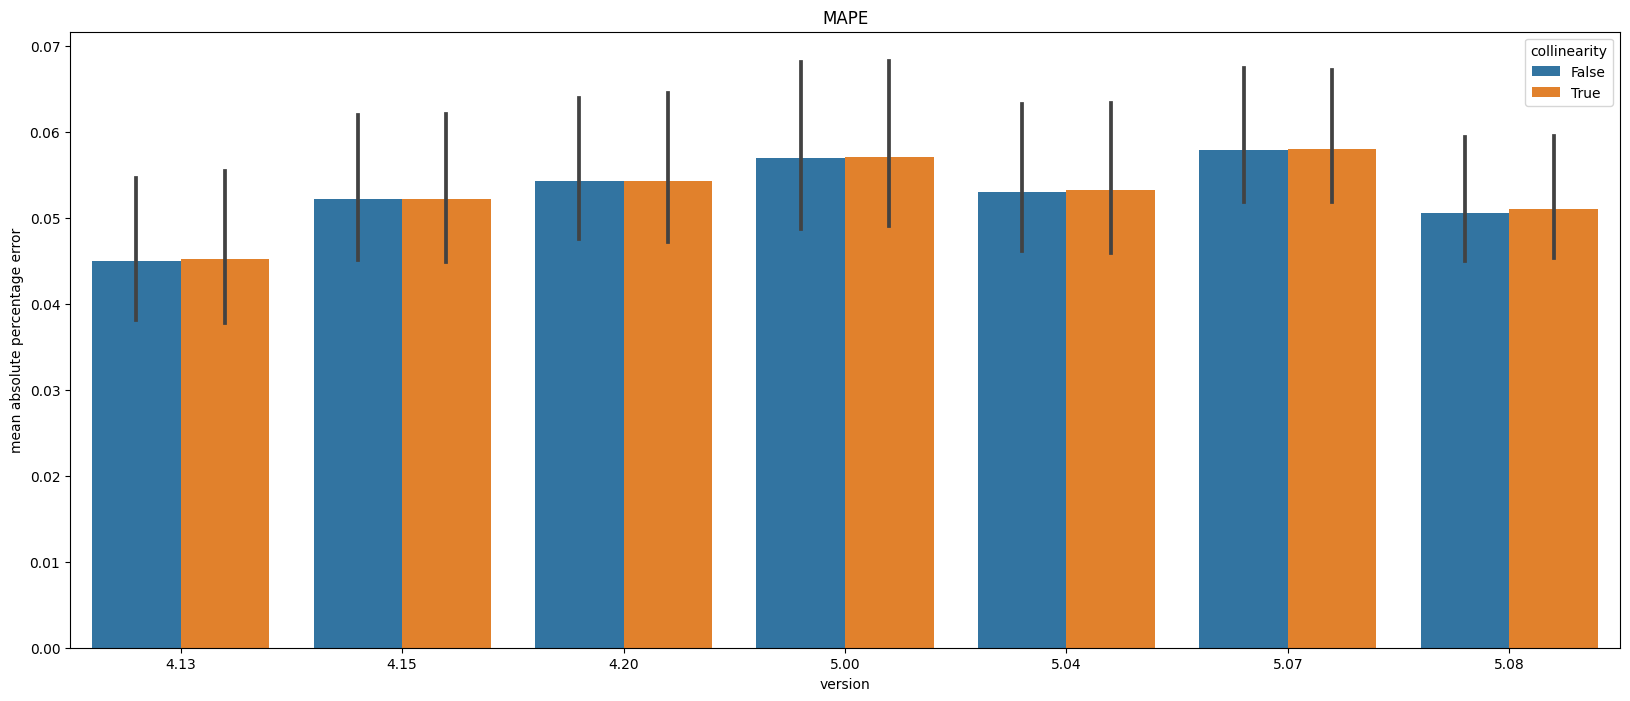

In [7]:
plt.subplots(figsize=(20, 8))
sns.barplot(data=df, x="version", y="mean absolute percentage error", hue="collinearity").set(title='MAPE')

# Feature importance comparison and stability

In [8]:
res = Report().feature_importance_stability()

2022-12-13 09:03:05,124 :: INFO :: tuxai.report :: generating feature importance report


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

## List of all tested configuations
2 parameters are fixed and we observe variation for the 3rd parameter

In [9]:
list(res.keys())

['version = 4.13, collinearity = False -> target',
 'version = 4.13, collinearity = True -> target',
 'version = 4.15, collinearity = False -> target',
 'version = 4.15, collinearity = True -> target',
 'version = 4.20, collinearity = False -> target',
 'version = 4.20, collinearity = True -> target',
 'version = 5.00, collinearity = False -> target',
 'version = 5.00, collinearity = True -> target',
 'version = 5.04, collinearity = False -> target',
 'version = 5.04, collinearity = True -> target',
 'version = 5.07, collinearity = False -> target',
 'version = 5.07, collinearity = True -> target',
 'version = 5.08, collinearity = False -> target',
 'version = 5.08, collinearity = True -> target',
 'version = 4.13, target = vmlinux -> collinearity',
 'version = 4.13, target = GZIP-vmlinux -> collinearity',
 'version = 4.13, target = BZIP2-vmlinux -> collinearity',
 'version = 4.13, target = LZMA-vmlinux -> collinearity',
 'version = 4.13, target = XZ-vmlinux -> collinearity',
 'version

## Raw data + graph for a given configuration (with collinearity)

In [10]:
pd.options.display.max_colwidth = 100
key = 'collinearity = True, target = GZIP-vmlinux -> version'
res[key]["dataframe"]

,ranks,group
CORR|0001,"0, 0, 0","KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"0, 1, 1, 1, 1, 1, 2",
UBSAN_SANITIZE_ALL,"0, 1, 2, 2, 2, 2, 2",
CORR|0265,"0, 0, 1","KASAN, KASAN_GENERIC, KASAN_OUTLINE"
KCOV_INSTRUMENT_ALL,"2, 3, 3, 4, 4, 5, 5",
UBSAN_ALIGNMENT,"3, 3, 3, 4, 4, 4, 5",
IKHEADERS,"3, 3, 4",
CORR|0002,"4, 7, 7, 7, 8, 9, 9","PRINTK, PRINTK_NMI"
CORR|0003,"5, 5, 6, 6, 6, 6, 7","MODULES, STRICT_MODULE_RWX"
UBSAN_NULL,"5, 8",


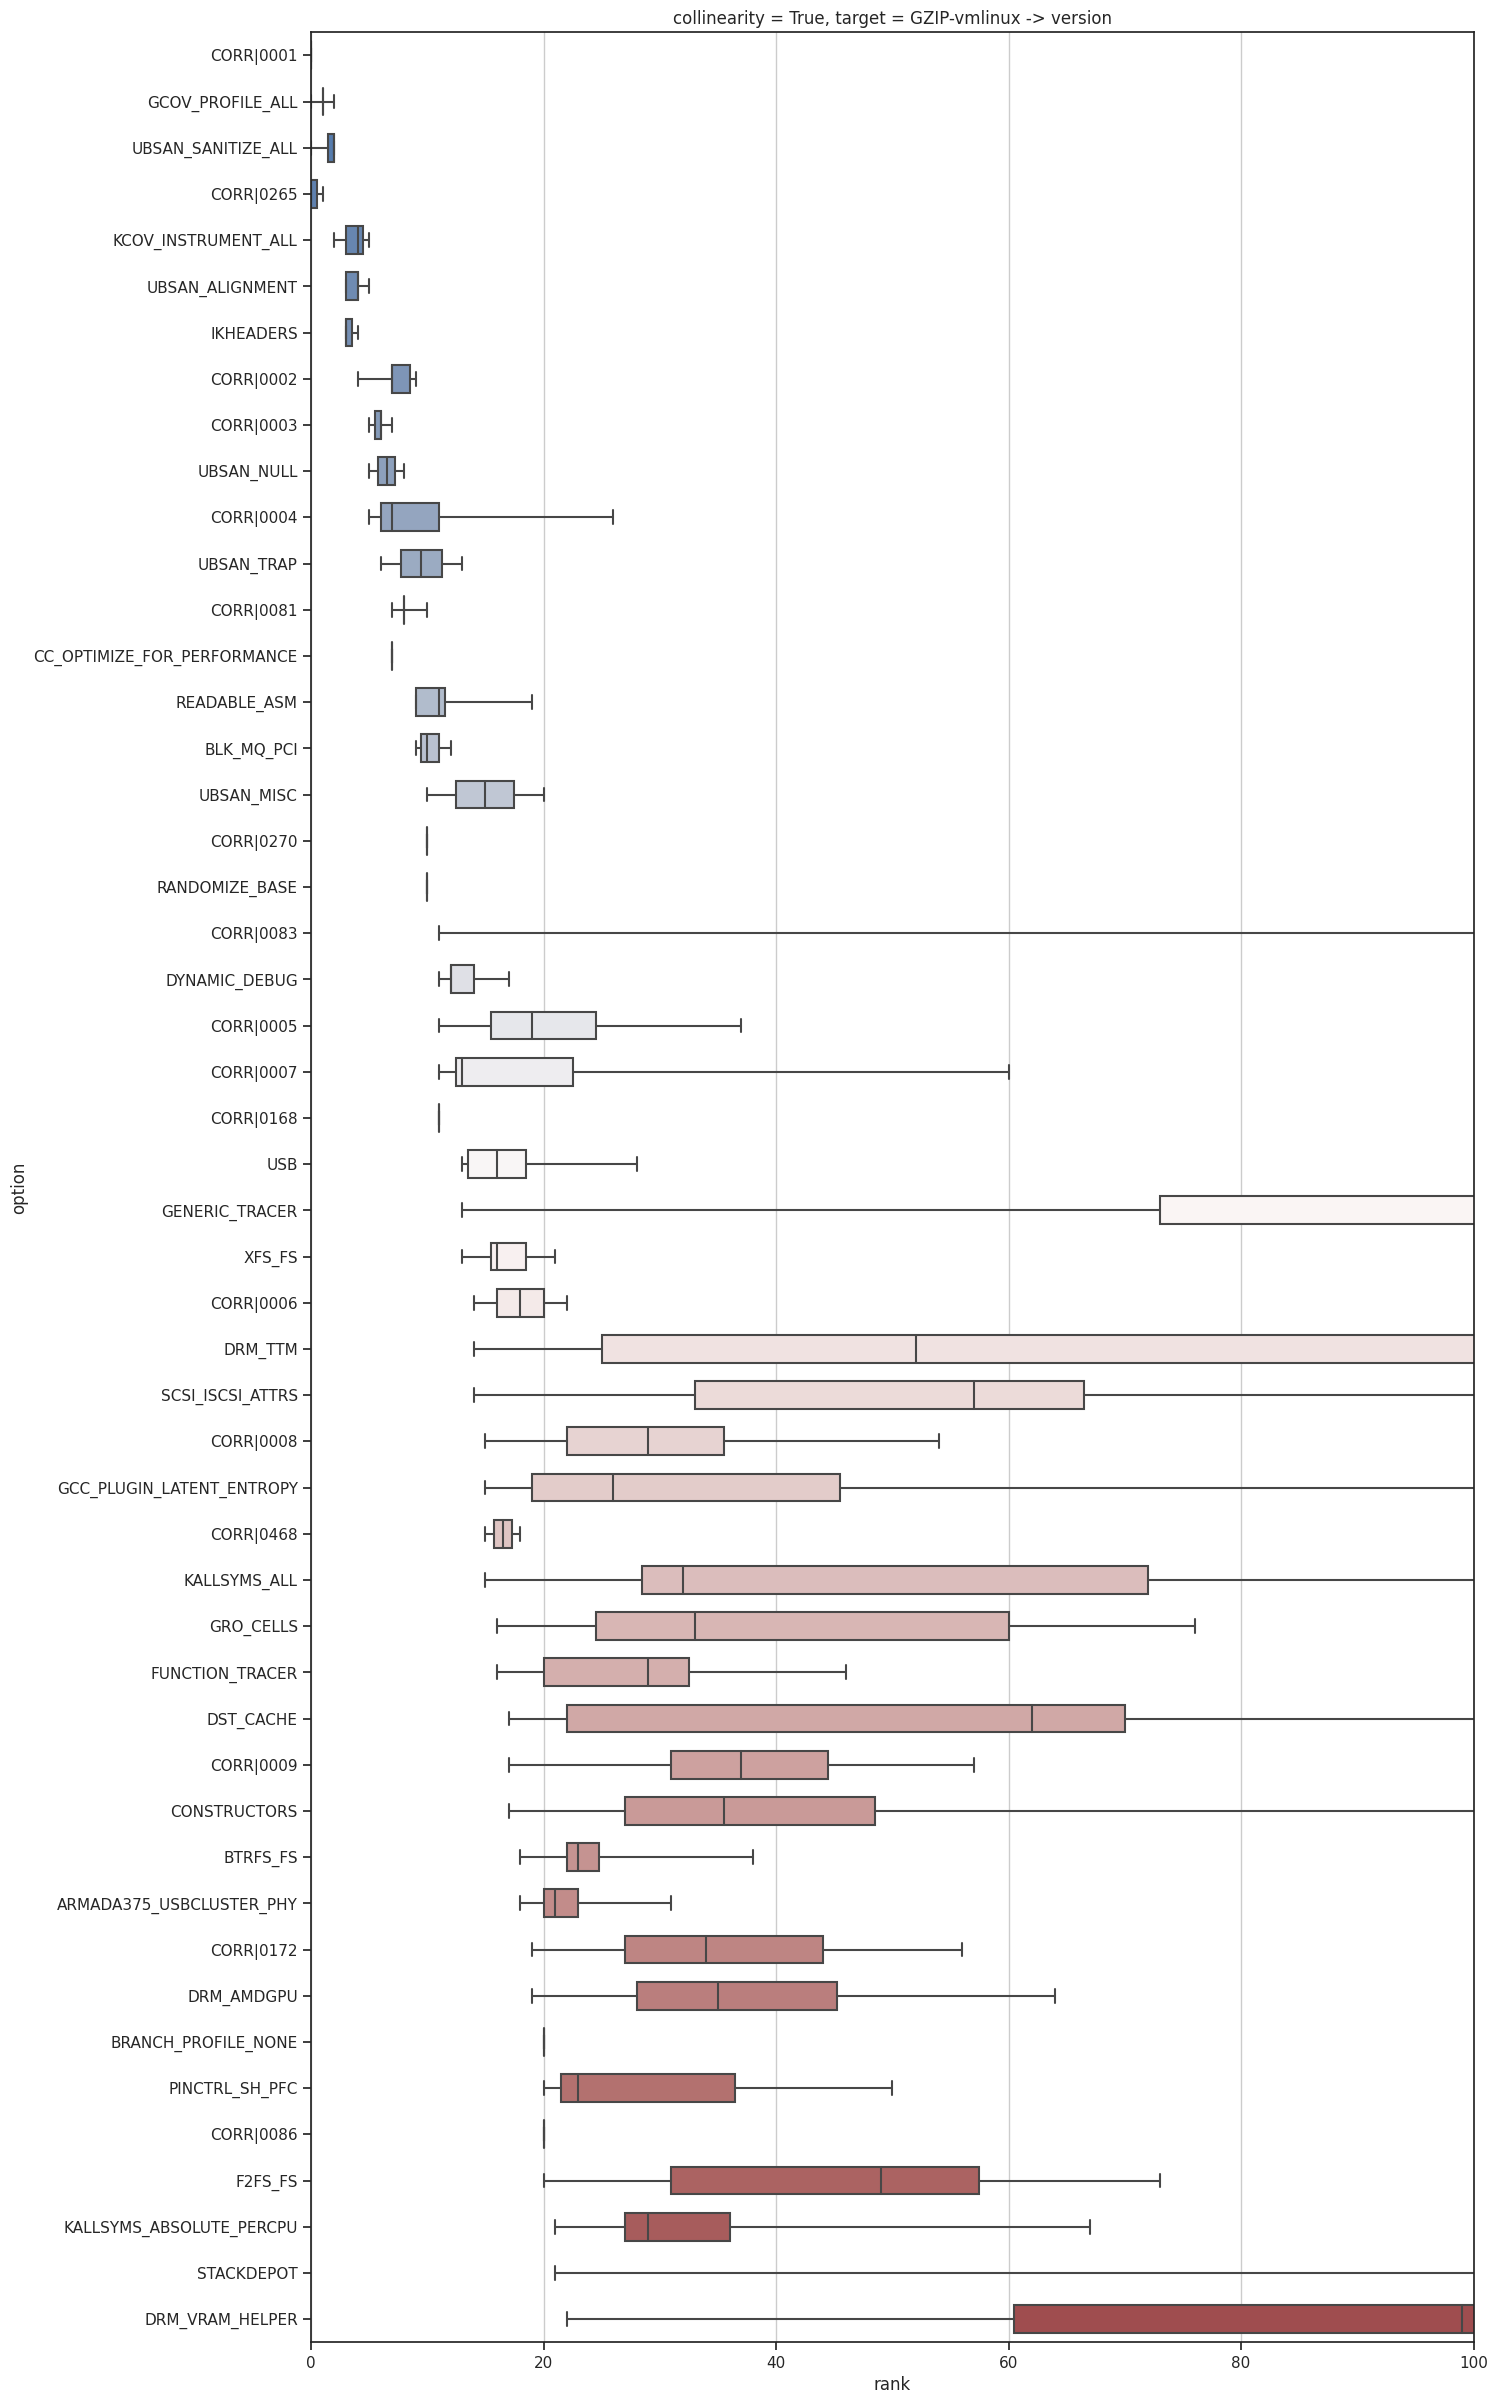

In [11]:
res[key]["plot"]

## Another example, without collinearity

In [12]:
key = 'collinearity = False, target = GZIP-vmlinux -> version'
res[key]["dataframe"]

,ranks,group
KASAN,"0, 0, 0, 0, 0, 1",
GCOV_PROFILE_ALL,"0, 1, 1, 1, 1, 1, 2",
UBSAN_SANITIZE_ALL,"0, 1, 2, 2, 2, 2, 2",
KCOV_INSTRUMENT_ALL,"2, 3, 3, 4, 4, 5, 5",
UBSAN_ALIGNMENT,"3, 3, 3, 4, 4, 4, 5",
IKHEADERS,"3, 3, 4",
PRINTK,"4, 7, 7, 7, 9, 9, 9",
MODULES,"5, 5, 6, 6, 7, 7, 7",
UBSAN_NULL,"5, 8",
BINARY_PRINTF,"5, 6, 6, 6, 8, 11, 11",


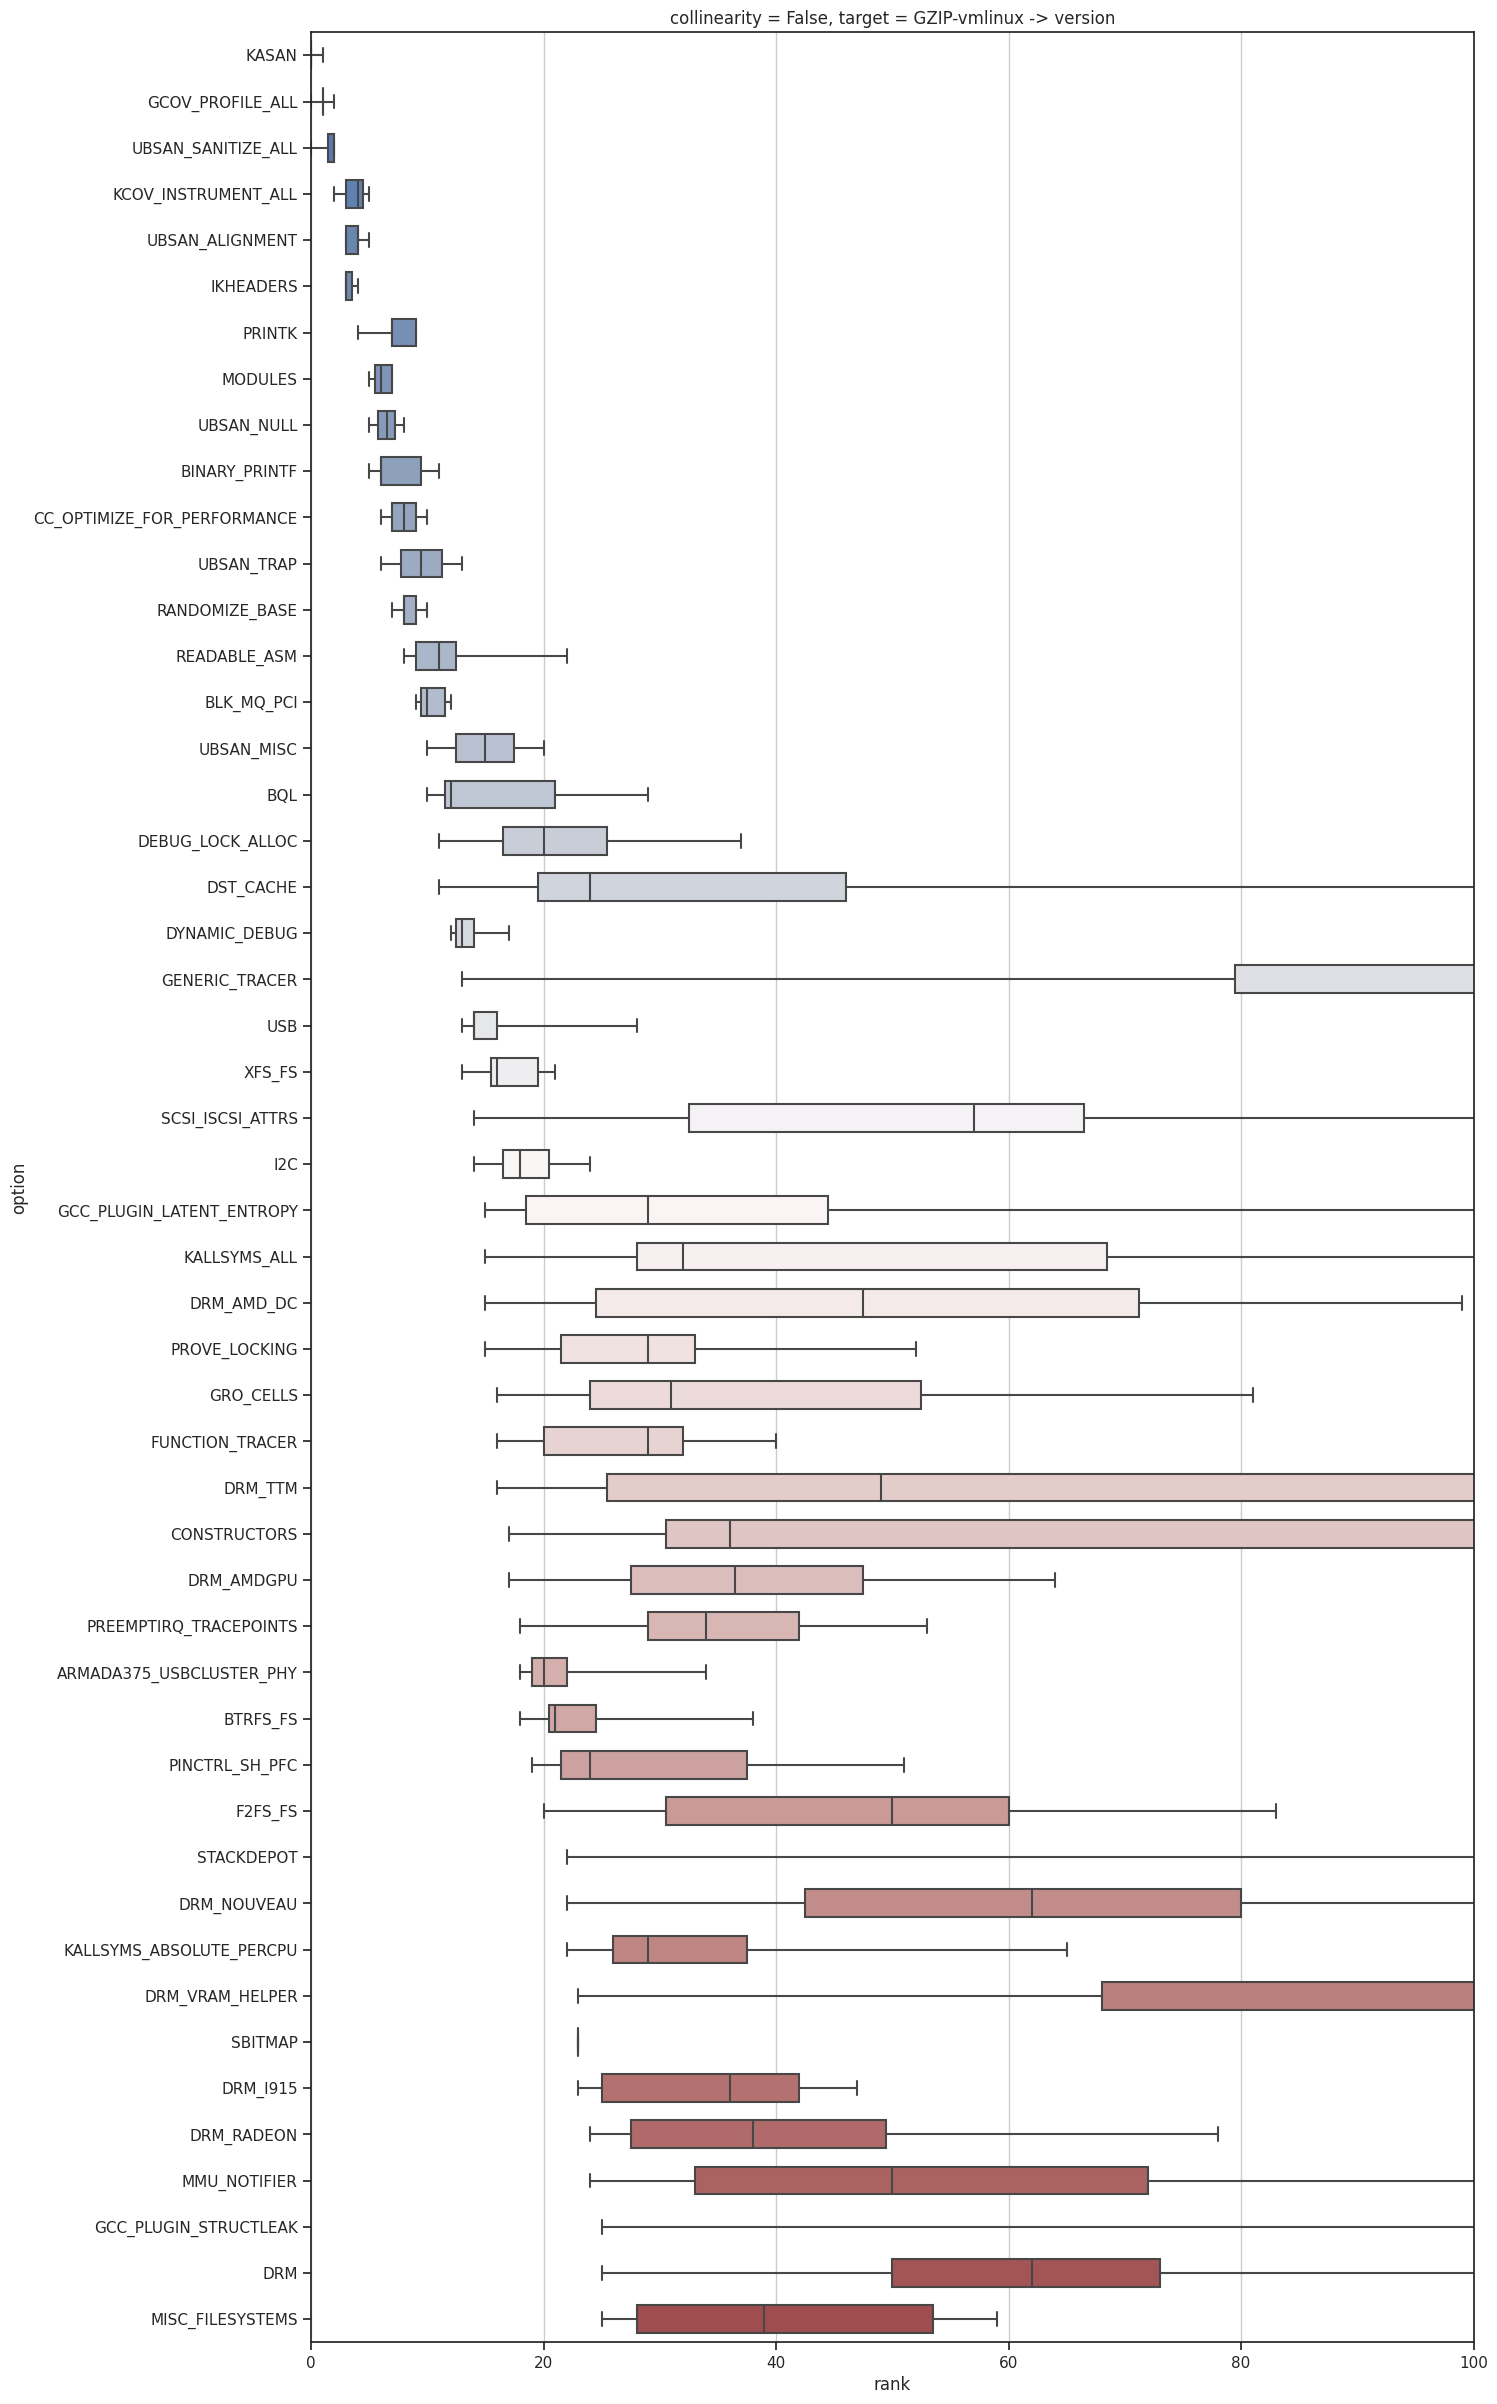

In [13]:
res[key]["plot"]

## All possible combinations

In [14]:
from IPython.display import display
for key, data in res.items():
    print(key)
    display(res[key]["dataframe"])

version = 4.13, collinearity = False -> target


,ranks,group
RANDOMIZE_BASE,"0, 3, 3, 5, 10, 11, 12",
UBSAN_SANITIZE_ALL,"0, 1, 1, 1, 1, 2, 2",
KASAN,"0, 0, 0, 0, 0, 1, 3",
DEBUG_INFO,"1, 1076, 1333",
GCOV_PROFILE_ALL,"1, 2, 2, 2, 2, 2, 7",
UBSAN_ALIGNMENT,"3, 3, 3, 4, 4, 4, 6",
KCOV_INSTRUMENT_ALL,"3, 4, 5, 5, 5, 8, 12",
DEBUG_INFO_REDUCED,"4, 1035, 1037, 1054",
CC_OPTIMIZE_FOR_PERFORMANCE,"4, 5, 6, 6, 7, 8, 18",
PRINTK,"4, 5, 6, 7, 7, 8, 13",


version = 4.13, collinearity = True -> target


,ranks,group
RANDOMIZE_BASE,"0, 3, 3, 5, 10, 11, 11",
UBSAN_SANITIZE_ALL,"0, 1, 1, 1, 1, 2, 2",
CORR|0001,"0, 0, 0, 0, 0, 1, 3","KASAN, KASAN_OUTLINE"
DEBUG_INFO,"1, 1072, 1209",
GCOV_PROFILE_ALL,"1, 2, 2, 2, 2, 2, 7",
UBSAN_ALIGNMENT,"3, 3, 3, 4, 4, 4, 6",
KCOV_INSTRUMENT_ALL,"3, 4, 5, 5, 5, 8, 12",
DEBUG_INFO_REDUCED,"4, 1003, 1071, 1179",
CC_OPTIMIZE_FOR_PERFORMANCE,"4, 5, 6, 6, 7, 8, 18",
CORR|0003,"4, 5, 6, 7, 7, 8, 14","PRINTK, PRINTK_NMI"


version = 4.15, collinearity = False -> target


,ranks,group
RANDOMIZE_BASE,"0, 3, 3, 3, 7, 10, 11",
KASAN,"0, 0, 0, 0, 0, 0, 2",
DEBUG_INFO,"1, 513, 957, 1178, 1248, 1270, 1290",
GCOV_PROFILE_ALL,"1, 1, 1, 1, 1, 1, 6",
UBSAN_SANITIZE_ALL,"2, 2, 2, 2, 2, 2, 3",
KCOV_INSTRUMENT_ALL,"3, 3, 5, 5, 5, 8, 11",
UBSAN_ALIGNMENT,"3, 4, 4, 4, 4, 4, 7",
MODULES,"4, 5, 6, 6, 7, 7, 8",
DEBUG_INFO_SPLIT,"4, 1150, 1177, 1289",
UBSAN_NULL,"5, 6, 6, 6, 7, 7, 12",


version = 4.15, collinearity = True -> target


,ranks,group
CORR|0001,"0, 3, 3, 3, 7, 10, 10","RANDOMIZE_BASE, X86_NEED_RELOCS"
CORR|0002,"0, 0, 0, 0, 0, 0, 2","KASAN, KASAN_OUTLINE"
DEBUG_INFO,"1, 542, 1173, 1213, 1246, 1280, 1437",
GCOV_PROFILE_ALL,"1, 1, 1, 1, 1, 1, 6",
UBSAN_SANITIZE_ALL,"2, 2, 2, 2, 2, 2, 3",
UBSAN_ALIGNMENT,"3, 4, 4, 4, 4, 4, 7",
KCOV_INSTRUMENT_ALL,"3, 3, 5, 5, 5, 8, 11",
DEBUG_INFO_SPLIT,"4, 1172, 1212, 1281",
CORR|0003,"4, 5, 6, 6, 6, 7, 8","MODULES, STRICT_MODULE_RWX"
DEBUG_INFO_REDUCED,"5, 1173",


version = 4.20, collinearity = False -> target


,ranks,group
DEBUG_INFO,0,
KASAN,"0, 0, 0, 0, 0, 0, 2",
RANDOMIZE_BASE,"1, 3, 4, 4, 8, 9, 10",
UBSAN_SANITIZE_ALL,"1, 1, 2, 2, 2, 2, 3",
GCOV_PROFILE_ALL,"1, 1, 1, 1, 2, 2, 7",
UBSAN_ALIGNMENT,"3, 3, 3, 3, 3, 4, 6",
DEBUG_INFO_SPLIT,"4, 556",
MODULES,"4, 6, 6, 6, 6, 6, 8",
KCOV_INSTRUMENT_ALL,"4, 4, 5, 5, 5, 7, 10",
DEBUG_INFO_REDUCED,"5, 1264, 1584",


version = 4.20, collinearity = True -> target


,ranks,group
DEBUG_INFO,0,
CORR|0002,"0, 0, 0, 0, 0, 0, 2","KASAN, KASAN_OUTLINE"
CORR|0001,"1, 3, 4, 4, 8, 9, 10","RANDOMIZE_BASE, X86_NEED_RELOCS"
UBSAN_SANITIZE_ALL,"1, 1, 2, 2, 2, 2, 3",
GCOV_PROFILE_ALL,"1, 1, 1, 1, 2, 2, 7",
UBSAN_ALIGNMENT,"3, 3, 3, 3, 3, 4, 6",
DEBUG_INFO_SPLIT,"4, 604",
CORR|0003,"4, 6, 6, 6, 6, 6, 8","MODULES, STRICT_MODULE_RWX"
KCOV_INSTRUMENT_ALL,"4, 4, 5, 5, 5, 7, 10",
DEBUG_INFO_REDUCED,"5, 1203, 1494",


version = 5.00, collinearity = False -> target


,ranks,group
DEBUG_INFO,"0, 253, 679",
KASAN,"0, 0, 0, 0, 0, 0, 2",
RANDOMIZE_BASE,"1, 3, 3, 3, 8, 8, 10",
UBSAN_SANITIZE_ALL,"1, 1, 1, 1, 2, 2, 3",
GCOV_PROFILE_ALL,"1, 1, 2, 2, 2, 2, 6",
UBSAN_ALIGNMENT,"3, 4, 4, 4, 5, 5, 8",
KCOV_INSTRUMENT_ALL,"3, 3, 4, 4, 5, 7, 9",
DEBUG_INFO_REDUCED,"4, 2137",
MODULES,"4, 5, 5, 6, 6, 7, 7",
DEBUG_INFO_SPLIT,"5, 721, 1386, 1392, 2127",


version = 5.00, collinearity = True -> target


,ranks,group
DEBUG_INFO,"0, 271, 581",
CORR|0002,"0, 0, 0, 0, 0, 0, 2","KASAN, KASAN_GENERIC, KASAN_OUTLINE"
CORR|0001,"1, 3, 3, 3, 8, 8, 9","RANDOMIZE_BASE, X86_NEED_RELOCS"
UBSAN_SANITIZE_ALL,"1, 1, 1, 1, 2, 2, 3",
GCOV_PROFILE_ALL,"1, 1, 2, 2, 2, 2, 7",
UBSAN_ALIGNMENT,"3, 4, 4, 4, 5, 5, 8",
KCOV_INSTRUMENT_ALL,"3, 3, 4, 4, 5, 7, 9",
DEBUG_INFO_REDUCED,"4, 1546",
CORR|0003,"4, 5, 5, 6, 6, 6, 7","MODULES, STRICT_MODULE_RWX"
DEBUG_INFO_SPLIT,"5, 672, 1254, 1311, 1386",


version = 5.04, collinearity = False -> target


,ranks,group
DEBUG_INFO,"0, 1222, 1314",
KASAN,"0, 0, 0, 0, 0, 0, 2",
RANDOMIZE_BASE,"1, 3, 3, 3, 8, 11, 11",
UBSAN_SANITIZE_ALL,"1, 1, 1, 2, 2, 2, 3",
GCOV_PROFILE_ALL,"1, 1, 1, 2, 2, 2, 6",
IKHEADERS,"3, 3, 3, 4, 4, 4, 15",
AMD_MEM_ENCRYPT,4,
UBSAN_ALIGNMENT,"4, 4, 4, 5, 5, 5, 9",
DEBUG_INFO_REDUCED,5,
MODULES,"5, 6, 7, 7, 7, 7, 8",


version = 5.04, collinearity = True -> target


,ranks,group
DEBUG_INFO,"0, 1244, 1245",
CORR|0002,"0, 0, 0, 0, 0, 0, 2","KASAN, KASAN_GENERIC, KASAN_OUTLINE"
CORR|0001,"1, 3, 3, 3, 8, 10, 10","RANDOMIZE_BASE, X86_NEED_RELOCS"
UBSAN_SANITIZE_ALL,"1, 1, 1, 2, 2, 2, 3",
GCOV_PROFILE_ALL,"1, 1, 1, 2, 2, 2, 6",
IKHEADERS,"3, 3, 3, 4, 4, 4, 21",
UBSAN_ALIGNMENT,"4, 4, 4, 5, 5, 5, 9",
CORR|0003,4,"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DYNAMIC_PHYSICAL_MASK"
CORR|0004,"5, 6, 6, 7, 7, 7, 8","MODULES, STRICT_MODULE_RWX"
KCOV_INSTRUMENT_ALL,"5, 5, 6, 6, 6, 8, 11",


version = 5.07, collinearity = False -> target


,ranks,group
RANDOMIZE_BASE,"0, 4, 7, 7, 10, 13, 17",
KASAN,"0, 0, 0, 0, 0, 1, 2",
GCOV_PROFILE_ALL,"0, 1, 1, 1, 1, 1, 4",
DEBUG_INFO,"1, 141",
UBSAN_SANITIZE_ALL,"2, 2, 2, 2, 2, 2, 8",
AMD_MEM_ENCRYPT,"3, 672, 1660, 1784",
UBSAN_ALIGNMENT,"3, 3, 4, 5, 5, 5, 9",
IKHEADERS,"3, 3, 3, 3, 4, 5, 21",
KCOV_INSTRUMENT_ALL,"4, 4, 4, 5, 6, 8, 11",
DEBUG_INFO_SPLIT,"5, 548, 1494",


version = 5.07, collinearity = True -> target


,ranks,group
CORR|0001,"0, 4, 7, 7, 10, 13, 17","RANDOMIZE_BASE, X86_NEED_RELOCS"
CORR|0002,"0, 0, 0, 0, 1, 1, 2","KASAN, KASAN_GENERIC, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"0, 0, 1, 1, 1, 1, 4",
DEBUG_INFO,"1, 147",
UBSAN_SANITIZE_ALL,"2, 2, 2, 2, 2, 2, 8",
CORR|0003,"3, 626, 1422, 1839","AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DYNAMIC_PHYSICAL_MASK"
IKHEADERS,"3, 3, 3, 3, 4, 5, 21",
UBSAN_ALIGNMENT,"3, 3, 4, 5, 5, 5, 9",
KCOV_INSTRUMENT_ALL,"4, 4, 4, 5, 6, 8, 11",
DEBUG_INFO_SPLIT,"5, 625, 1403",


version = 5.08, collinearity = False -> target


,ranks,group
DEBUG_INFO,"0, 1807, 2172",
GCOV_PROFILE_ALL,"0, 0, 1, 1, 1, 1, 3",
UBSAN_SANITIZE_ALL,"0, 0, 0, 0, 1, 2, 8",
RANDOMIZE_BASE,"1, 4, 7, 8, 8, 11, 16",
KCOV_INSTRUMENT_ALL,"1, 2, 2, 2, 2, 5, 10",
UBSAN_ALIGNMENT,"2, 3, 3, 3, 3, 3, 9",
AMD_MEM_ENCRYPT,"2, 82, 1590",
IKHEADERS,"3, 4, 4, 4, 4, 5, 18",
DEBUG_INFO_REDUCED,"4, 268, 664, 1789",
MODULES,"4, 5, 5, 5, 6, 6, 7",


version = 5.08, collinearity = True -> target


,ranks,group
DEBUG_INFO,"0, 1345, 1397",
GCOV_PROFILE_ALL,"0, 0, 1, 1, 1, 1, 3",
UBSAN_SANITIZE_ALL,"0, 0, 0, 0, 1, 2, 8",
CORR|0001,"1, 4, 7, 8, 8, 11, 15","RANDOMIZE_BASE, X86_NEED_RELOCS"
KCOV_INSTRUMENT_ALL,"1, 2, 2, 2, 2, 6, 10",
CORR|0002,"2, 70, 1663","AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DMA_COHERENT_POOL, DYNAMIC_PHYSICAL_MASK"
UBSAN_ALIGNMENT,"2, 3, 3, 3, 3, 3, 9",
IKHEADERS,"3, 4, 4, 4, 4, 5, 19",
DEBUG_INFO_REDUCED,"4, 276, 639, 1349",
CORR|0003,"4, 5, 5, 5, 6, 6, 7","MODULES, STRICT_MODULE_RWX"


version = 4.13, target = vmlinux -> collinearity


,ranks,group
RANDOMIZE_BASE,"0, 0",
DEBUG_INFO,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
CORR|0001,3,"KASAN, KASAN_OUTLINE"
KASAN,3,
DEBUG_INFO_REDUCED,"4, 4",
DEBUG_INFO_SPLIT,"5, 5",
UBSAN_ALIGNMENT,"6, 6",
GCOV_PROFILE_ALL,"7, 7",
MODULES,8,


version = 4.13, target = GZIP-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
PRINTK,4,
CORR|0002,4,"PRINTK, PRINTK_NMI"
KCOV_INSTRUMENT_ALL,"5, 5",
CC_OPTIMIZE_FOR_PERFORMANCE,"6, 7",
CORR|0003,6,"MODULES, STRICT_MODULE_RWX"


version = 4.13, target = BZIP2-vmlinux -> collinearity


,ranks,group
UBSAN_SANITIZE_ALL,"0, 0",
CORR|0001,1,"KASAN, KASAN_OUTLINE"
KASAN,1,
GCOV_PROFILE_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
KCOV_INSTRUMENT_ALL,"4, 4",
RANDOMIZE_BASE,"5, 5",
CC_OPTIMIZE_FOR_PERFORMANCE,"6, 6",
CORR|0002,7,"MODULES, STRICT_MODULE_RWX"
MODULES,7,


version = 4.13, target = LZMA-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1",
GCOV_PROFILE_ALL,"2, 2",
KCOV_INSTRUMENT_ALL,"3, 3",
UBSAN_ALIGNMENT,"4, 4",
CC_OPTIMIZE_FOR_PERFORMANCE,"5, 5",
CORR|0002,6,"MODULES, STRICT_MODULE_RWX"
MODULES,6,
PRINTK,7,


version = 4.13, target = XZ-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1",
GCOV_PROFILE_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
CC_OPTIMIZE_FOR_PERFORMANCE,"4, 4",
CORR|0002,5,"PRINTK, PRINTK_NMI"
PRINTK,5,
MODULES,6,
CORR|0003,6,"MODULES, STRICT_MODULE_RWX"


version = 4.13, target = LZO-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1",
GCOV_PROFILE_ALL,"2, 2",
RANDOMIZE_BASE,"3, 3",
UBSAN_ALIGNMENT,"4, 4",
KCOV_INSTRUMENT_ALL,"5, 5",
CORR|0002,6,"PRINTK, PRINTK_NMI"
MODULES,6,
CORR|0003,7,"MODULES, STRICT_MODULE_RWX"


version = 4.13, target = LZ4-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1",
GCOV_PROFILE_ALL,"2, 2",
RANDOMIZE_BASE,"3, 3",
UBSAN_ALIGNMENT,"4, 4",
KCOV_INSTRUMENT_ALL,"5, 5",
PRINTK,6,
CC_OPTIMIZE_FOR_PERFORMANCE,"6, 7",
CORR|0002,7,"PRINTK, PRINTK_NMI"


version = 4.15, target = vmlinux -> collinearity


,ranks,group
RANDOMIZE_BASE,0,
CORR|0001,0,"RANDOMIZE_BASE, X86_NEED_RELOCS"
DEBUG_INFO,"1, 1",
KASAN,2,
CORR|0002,2,"KASAN, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"3, 3",
DEBUG_INFO_SPLIT,"4, 4",
DEBUG_INFO_REDUCED,"5, 5",
GCOV_PROFILE_ALL,"6, 6",
UBSAN_ALIGNMENT,"7, 7",


version = 4.15, target = GZIP-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
KCOV_INSTRUMENT_ALL,"3, 3",
UBSAN_ALIGNMENT,"4, 4",
UBSAN_NULL,"5, 5",
CORR|0002,6,"MODULES, STRICT_MODULE_RWX"
MODULES,6,
RANDOMIZE_BASE,7,


version = 4.15, target = BZIP2-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
CORR|0002,3,"RANDOMIZE_BASE, X86_NEED_RELOCS"
RANDOMIZE_BASE,3,
UBSAN_ALIGNMENT,"4, 4",
KCOV_INSTRUMENT_ALL,"5, 5",
UBSAN_NULL,"6, 7",
CORR|0003,6,"MODULES, STRICT_MODULE_RWX"


version = 4.15, target = LZMA-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
KCOV_INSTRUMENT_ALL,"3, 3",
UBSAN_ALIGNMENT,"4, 4",
CORR|0002,5,"MODULES, STRICT_MODULE_RWX"
MODULES,5,
UBSAN_NULL,"6, 6",
PRINTK,7,


version = 4.15, target = XZ-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
MODULES,4,
CORR|0002,4,"MODULES, STRICT_MODULE_RWX"
CORR|0003,5,"PRINTK, PRINTK_NMI"
PRINTK,5,
READABLE_ASM,"6, 6",


version = 4.15, target = LZO-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
RANDOMIZE_BASE,3,
CORR|0002,3,"RANDOMIZE_BASE, X86_NEED_RELOCS"
UBSAN_ALIGNMENT,"4, 4",
KCOV_INSTRUMENT_ALL,"5, 5",
CORR|0003,6,"MODULES, STRICT_MODULE_RWX"
MODULES,6,


version = 4.15, target = LZ4-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
CORR|0002,3,"RANDOMIZE_BASE, X86_NEED_RELOCS"
RANDOMIZE_BASE,3,
UBSAN_ALIGNMENT,"4, 4",
KCOV_INSTRUMENT_ALL,"5, 5",
UBSAN_NULL,"6, 6",
CORR|0003,7,"MODULES, STRICT_MODULE_RWX"


version = 4.20, target = vmlinux -> collinearity


,ranks,group
DEBUG_INFO,"0, 0",
RANDOMIZE_BASE,1,
CORR|0001,1,"RANDOMIZE_BASE, X86_NEED_RELOCS"
CORR|0002,2,"KASAN, KASAN_OUTLINE"
KASAN,2,
UBSAN_SANITIZE_ALL,"3, 3",
DEBUG_INFO_SPLIT,"4, 4",
DEBUG_INFO_REDUCED,"5, 5",
UBSAN_ALIGNMENT,"6, 6",
GCOV_PROFILE_ALL,"7, 7",


version = 4.20, target = GZIP-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
KCOV_INSTRUMENT_ALL,"4, 4",
CORR|0002,5,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"
BINARY_PRINTF,5,
MODULES,6,
CORR|0003,6,"MODULES, STRICT_MODULE_RWX"


version = 4.20, target = BZIP2-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
CORR|0002,4,"RANDOMIZE_BASE, X86_NEED_RELOCS"
RANDOMIZE_BASE,4,
KCOV_INSTRUMENT_ALL,"5, 5",
MODULES,6,
CORR|0003,6,"MODULES, STRICT_MODULE_RWX"


version = 4.20, target = LZMA-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1",
GCOV_PROFILE_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
KCOV_INSTRUMENT_ALL,"4, 4",
CORR|0002,5,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"
BINARY_PRINTF,5,
CORR|0003,6,"MODULES, STRICT_MODULE_RWX"
MODULES,6,


version = 4.20, target = XZ-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1",
GCOV_PROFILE_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
CORR|0002,4,"MODULES, STRICT_MODULE_RWX"
MODULES,4,
BINARY_PRINTF,5,
CORR|0003,5,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"
PRINTK,6,


version = 4.20, target = LZO-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
CORR|0002,4,"RANDOMIZE_BASE, X86_NEED_RELOCS"
RANDOMIZE_BASE,4,
KCOV_INSTRUMENT_ALL,"5, 5",
CORR|0003,6,"MODULES, STRICT_MODULE_RWX"
MODULES,6,


version = 4.20, target = LZ4-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
RANDOMIZE_BASE,3,
CORR|0002,3,"RANDOMIZE_BASE, X86_NEED_RELOCS"
UBSAN_ALIGNMENT,"4, 4",
KCOV_INSTRUMENT_ALL,"5, 5",
CORR|0003,6,"MODULES, STRICT_MODULE_RWX"
MODULES,6,


version = 5.00, target = vmlinux -> collinearity


,ranks,group
DEBUG_INFO,"0, 0",
CORR|0001,1,"RANDOMIZE_BASE, X86_NEED_RELOCS"
RANDOMIZE_BASE,1,
KASAN,2,
CORR|0002,2,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"3, 3",
DEBUG_INFO_REDUCED,"4, 4",
DEBUG_INFO_SPLIT,"5, 5",
GCOV_PROFILE_ALL,"6, 7",
CORR|0003,6,"MODULES, STRICT_MODULE_RWX"


version = 5.00, target = GZIP-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
KCOV_INSTRUMENT_ALL,"3, 3",
UBSAN_ALIGNMENT,"4, 4",
CORR|0002,5,"MODULES, STRICT_MODULE_RWX"
MODULES,5,
BINARY_PRINTF,6,
CORR|0003,6,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"


version = 5.00, target = BZIP2-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1",
GCOV_PROFILE_ALL,"2, 2",
RANDOMIZE_BASE,3,
CORR|0002,3,"RANDOMIZE_BASE, X86_NEED_RELOCS"
KCOV_INSTRUMENT_ALL,"4, 4",
UBSAN_ALIGNMENT,"5, 5",
CORR|0003,6,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"
BINARY_PRINTF,6,


version = 5.00, target = LZMA-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1",
GCOV_PROFILE_ALL,"2, 2",
KCOV_INSTRUMENT_ALL,"3, 3",
UBSAN_ALIGNMENT,"4, 4",
MODULES,5,
CORR|0002,5,"MODULES, STRICT_MODULE_RWX"
CORR|0003,6,"PRINTK, PRINTK_NMI"
PRINTK,6,


version = 5.00, target = XZ-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1",
GCOV_PROFILE_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
CORR|0002,4,"MODULES, STRICT_MODULE_RWX"
MODULES,4,
BINARY_PRINTF,5,
CORR|0003,5,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"
CORR|0004,6,"PRINTK, PRINTK_NMI"


version = 5.00, target = LZO-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
RANDOMIZE_BASE,3,
CORR|0002,3,"RANDOMIZE_BASE, X86_NEED_RELOCS"
KCOV_INSTRUMENT_ALL,"4, 4",
UBSAN_ALIGNMENT,"5, 5",
CORR|0003,6,"MODULES, STRICT_MODULE_RWX"
MODULES,6,


version = 5.00, target = LZ4-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1",
GCOV_PROFILE_ALL,"2, 2",
RANDOMIZE_BASE,3,
CORR|0002,3,"RANDOMIZE_BASE, X86_NEED_RELOCS"
UBSAN_ALIGNMENT,"4, 4",
KCOV_INSTRUMENT_ALL,"5, 5",
CORR|0003,6,"MODULES, STRICT_MODULE_RWX"
MODULES,6,


version = 5.04, target = vmlinux -> collinearity


,ranks,group
DEBUG_INFO,"0, 0",
CORR|0001,1,"RANDOMIZE_BASE, X86_NEED_RELOCS"
RANDOMIZE_BASE,1,
KASAN,2,
CORR|0002,2,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"3, 3",
CORR|0003,4,"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DYNAMIC_PHYSICAL_MASK"
AMD_MEM_ENCRYPT,4,
DEBUG_INFO_REDUCED,"5, 5",
GCOV_PROFILE_ALL,"6, 6",


version = 5.04, target = GZIP-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1",
GCOV_PROFILE_ALL,"2, 2",
IKHEADERS,"3, 3",
UBSAN_ALIGNMENT,"4, 4",
KCOV_INSTRUMENT_ALL,"5, 5",
BINARY_PRINTF,6,
CORR|0002,6,"MODULES, STRICT_MODULE_RWX"
CORR|0003,7,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"


version = 5.04, target = BZIP2-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
CORR|0002,3,"RANDOMIZE_BASE, X86_NEED_RELOCS"
RANDOMIZE_BASE,3,
IKHEADERS,"4, 4",
UBSAN_ALIGNMENT,"5, 5",
KCOV_INSTRUMENT_ALL,"6, 6",
CORR|0003,7,"MODULES, STRICT_MODULE_RWX"


version = 5.04, target = LZMA-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1",
GCOV_PROFILE_ALL,"2, 2",
IKHEADERS,"3, 3",
UBSAN_ALIGNMENT,"4, 4",
KCOV_INSTRUMENT_ALL,"5, 5",
CORR|0002,6,"MODULES, STRICT_MODULE_RWX"
MODULES,6,
PRINTK,7,


version = 5.04, target = XZ-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1",
GCOV_PROFILE_ALL,"2, 2",
IKHEADERS,"3, 3",
UBSAN_ALIGNMENT,"4, 4",
CORR|0002,5,"MODULES, STRICT_MODULE_RWX"
MODULES,5,
PRINTK,6,
CORR|0003,6,"PRINTK, PRINTK_NMI"


version = 5.04, target = LZO-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
CORR|0002,3,"RANDOMIZE_BASE, X86_NEED_RELOCS"
RANDOMIZE_BASE,3,
IKHEADERS,"4, 4",
UBSAN_ALIGNMENT,"5, 5",
KCOV_INSTRUMENT_ALL,"6, 6",
CORR|0003,7,"MODULES, STRICT_MODULE_RWX"


version = 5.04, target = LZ4-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
RANDOMIZE_BASE,3,
CORR|0002,3,"RANDOMIZE_BASE, X86_NEED_RELOCS"
IKHEADERS,"4, 4",
UBSAN_ALIGNMENT,"5, 5",
KCOV_INSTRUMENT_ALL,"6, 6",
CORR|0003,7,"MODULES, STRICT_MODULE_RWX"


version = 5.07, target = vmlinux -> collinearity


,ranks,group
RANDOMIZE_BASE,0,
CORR|0001,0,"RANDOMIZE_BASE, X86_NEED_RELOCS"
DEBUG_INFO,"1, 1",
KASAN,2,
CORR|0002,2,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
AMD_MEM_ENCRYPT,3,
CORR|0003,3,"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DYNAMIC_PHYSICAL_MASK"
GCOV_PROFILE_ALL,"4, 4",
DEBUG_INFO_SPLIT,"5, 5",
DEBUG_INFO_REDUCED,"6, 6",


version = 5.07, target = GZIP-vmlinux -> collinearity


,ranks,group
GCOV_PROFILE_ALL,"0, 0",
CORR|0001,1,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
KASAN,1,
UBSAN_SANITIZE_ALL,"2, 2",
IKHEADERS,"3, 3",
KCOV_INSTRUMENT_ALL,"4, 4",
UBSAN_ALIGNMENT,"5, 5",
UBSAN_TRAP,"6, 6",
MODULES,7,
CORR|0002,7,"MODULES, STRICT_MODULE_RWX"


version = 5.07, target = BZIP2-vmlinux -> collinearity


,ranks,group
KASAN,0,
GCOV_PROFILE_ALL,"0, 1",
CORR|0001,1,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"2, 2",
IKHEADERS,"3, 3",
KCOV_INSTRUMENT_ALL,"4, 4",
UBSAN_ALIGNMENT,"5, 5",
CORR|0002,6,"MODULES, STRICT_MODULE_RWX"
MODULES,6,
RANDOMIZE_BASE,7,


version = 5.07, target = LZMA-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
IKHEADERS,"3, 3",
KCOV_INSTRUMENT_ALL,"4, 4",
UBSAN_ALIGNMENT,"5, 5",
UBSAN_TRAP,"6, 6",
CORR|0002,7,"MODULES, STRICT_MODULE_RWX"
MODULES,7,


version = 5.07, target = XZ-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
IKHEADERS,"3, 3",
UBSAN_ALIGNMENT,"4, 4",
CORR|0002,5,"MODULES, STRICT_MODULE_RWX"
MODULES,5,
UBSAN_TRAP,"6, 6",
CORR|0003,7,"PRINTK, PRINTK_NMI"


version = 5.07, target = LZO-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
IKHEADERS,"4, 4",
KCOV_INSTRUMENT_ALL,"5, 5",
UBSAN_TRAP,"6, 6",
CORR|0002,7,"RANDOMIZE_BASE, X86_NEED_RELOCS"
RANDOMIZE_BASE,7,


version = 5.07, target = LZ4-vmlinux -> collinearity


,ranks,group
KASAN,0,
CORR|0001,0,"KASAN, KASAN_GENERIC, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
CORR|0002,4,"RANDOMIZE_BASE, X86_NEED_RELOCS"
RANDOMIZE_BASE,4,
IKHEADERS,"5, 5",
KCOV_INSTRUMENT_ALL,"6, 6",
UBSAN_TRAP,"7, 7",


version = 5.08, target = vmlinux -> collinearity


,ranks,group
DEBUG_INFO,"0, 0",
CORR|0001,1,"RANDOMIZE_BASE, X86_NEED_RELOCS"
RANDOMIZE_BASE,1,
AMD_MEM_ENCRYPT,2,
CORR|0002,2,"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DMA_COHERENT_POOL, DYNAMIC_PHYSICAL_MASK"
GCOV_PROFILE_ALL,"3, 3",
DEBUG_INFO_REDUCED,"4, 4",
DEBUG_INFO_COMPRESSED,"5, 5",
DEBUG_INFO_SPLIT,"6, 6",
CORR|0003,7,"MODULES, STRICT_MODULE_RWX"


version = 5.08, target = GZIP-vmlinux -> collinearity


,ranks,group
UBSAN_SANITIZE_ALL,"0, 0",
GCOV_PROFILE_ALL,"1, 1",
KCOV_INSTRUMENT_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
IKHEADERS,"4, 4",
CORR|0001,5,"MODULES, STRICT_MODULE_RWX"
MODULES,5,
BINARY_PRINTF,6,
CORR|0002,6,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"
CORR|0003,7,"PRINTK, PRINTK_NMI"


version = 5.08, target = BZIP2-vmlinux -> collinearity


,ranks,group
UBSAN_SANITIZE_ALL,"0, 0",
GCOV_PROFILE_ALL,"1, 1",
KCOV_INSTRUMENT_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
IKHEADERS,"4, 4",
CORR|0001,5,"MODULES, STRICT_MODULE_RWX"
MODULES,5,
BINARY_PRINTF,6,
CORR|0002,6,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"
CORR|0003,7,"PRINTK, PRINTK_NMI"


version = 5.08, target = LZMA-vmlinux -> collinearity


,ranks,group
GCOV_PROFILE_ALL,"0, 0",
KCOV_INSTRUMENT_ALL,"1, 1",
UBSAN_SANITIZE_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
IKHEADERS,"4, 4",
CORR|0001,5,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"
BINARY_PRINTF,5,
MODULES,6,
CORR|0002,6,"MODULES, STRICT_MODULE_RWX"
CORR|0003,7,"PRINTK, PRINTK_NMI"


version = 5.08, target = XZ-vmlinux -> collinearity


,ranks,group
GCOV_PROFILE_ALL,"0, 0",
UBSAN_SANITIZE_ALL,"1, 1",
UBSAN_ALIGNMENT,"2, 2",
IKHEADERS,"3, 3",
CORR|0001,4,"MODULES, STRICT_MODULE_RWX"
MODULES,4,
KCOV_INSTRUMENT_ALL,"5, 6",
CORR|0002,5,"PRINTK, PRINTK_NMI"
PRINTK,6,
BINARY_PRINTF,7,


version = 5.08, target = LZO-vmlinux -> collinearity


,ranks,group
UBSAN_SANITIZE_ALL,"0, 0",
GCOV_PROFILE_ALL,"1, 1",
KCOV_INSTRUMENT_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
IKHEADERS,"4, 4",
CORR|0001,5,"MODULES, STRICT_MODULE_RWX"
MODULES,5,
BINARY_PRINTF,6,
CORR|0002,6,"BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"
CORR|0003,7,"RANDOMIZE_BASE, X86_NEED_RELOCS"


version = 5.08, target = LZ4-vmlinux -> collinearity


,ranks,group
UBSAN_SANITIZE_ALL,"0, 0",
GCOV_PROFILE_ALL,"1, 1",
KCOV_INSTRUMENT_ALL,"2, 2",
UBSAN_ALIGNMENT,"3, 3",
CORR|0001,4,"RANDOMIZE_BASE, X86_NEED_RELOCS"
RANDOMIZE_BASE,4,
IKHEADERS,"5, 5",
CORR|0002,6,"MODULES, STRICT_MODULE_RWX"
MODULES,6,
BINARY_PRINTF,7,


collinearity = False, target = vmlinux -> version


,ranks,group
RANDOMIZE_BASE,"0, 0, 0, 1, 1, 1, 1",
DEBUG_INFO,"0, 0, 0, 0, 1, 1, 1",
UBSAN_SANITIZE_ALL,"2, 3, 3, 3, 3, 8, 8",
KASAN,"2, 2, 2, 2, 2, 3",
AMD_MEM_ENCRYPT,"2, 3, 4, 1704",
GCOV_PROFILE_ALL,"3, 4, 6, 6, 6, 7, 7",
DEBUG_INFO_REDUCED,"4, 4, 4, 5, 5, 5, 6",
DEBUG_INFO_SPLIT,"4, 4, 5, 5, 5, 6, 7",
DEBUG_INFO_COMPRESSED,5,
UBSAN_ALIGNMENT,"6, 6, 7, 8, 9, 9, 9",


collinearity = False, target = GZIP-vmlinux -> version


,ranks,group
KASAN,"0, 0, 0, 0, 0, 1",
GCOV_PROFILE_ALL,"0, 1, 1, 1, 1, 1, 2",
UBSAN_SANITIZE_ALL,"0, 1, 2, 2, 2, 2, 2",
KCOV_INSTRUMENT_ALL,"2, 3, 3, 4, 4, 5, 5",
UBSAN_ALIGNMENT,"3, 3, 3, 4, 4, 4, 5",
IKHEADERS,"3, 3, 4",
PRINTK,"4, 7, 7, 7, 9, 9, 9",
MODULES,"5, 5, 6, 6, 7, 7, 7",
UBSAN_NULL,"5, 8",
BINARY_PRINTF,"5, 6, 6, 6, 8, 11, 11",


collinearity = False, target = BZIP2-vmlinux -> version


,ranks,group
UBSAN_SANITIZE_ALL,"0, 0, 1, 2, 2, 2, 2",
KASAN,"0, 0, 0, 0, 0, 1",
GCOV_PROFILE_ALL,"1, 1, 1, 1, 1, 2, 2",
KCOV_INSTRUMENT_ALL,"2, 4, 4, 4, 5, 5, 6",
UBSAN_ALIGNMENT,"3, 3, 3, 4, 5, 5, 5",
RANDOMIZE_BASE,"3, 3, 3, 4, 5, 7, 8",
IKHEADERS,"3, 4, 4",
MODULES,"5, 6, 6, 7, 7, 7, 7",
CC_OPTIMIZE_FOR_PERFORMANCE,"6, 10",
UBSAN_NULL,"6, 9",


collinearity = False, target = LZMA-vmlinux -> version


,ranks,group
KASAN,"0, 0, 0, 0, 0, 0",
GCOV_PROFILE_ALL,"0, 1, 1, 2, 2, 2, 2",
UBSAN_SANITIZE_ALL,"1, 1, 1, 1, 2, 2, 2",
KCOV_INSTRUMENT_ALL,"1, 3, 3, 3, 4, 4, 5",
IKHEADERS,"3, 3, 4",
UBSAN_ALIGNMENT,"3, 3, 4, 4, 4, 4, 5",
CC_OPTIMIZE_FOR_PERFORMANCE,"5, 10",
MODULES,"5, 5, 6, 6, 6, 6, 7",
BINARY_PRINTF,"5, 5, 7, 8, 8, 11, 11",
PRINTK,"6, 7, 7, 7, 7, 7, 9",


collinearity = False, target = XZ-vmlinux -> version


,ranks,group
KASAN,"0, 0, 0, 0, 0, 0",
GCOV_PROFILE_ALL,"0, 1, 1, 2, 2, 2, 2",
UBSAN_SANITIZE_ALL,"1, 1, 1, 1, 1, 2, 2",
UBSAN_ALIGNMENT,"2, 3, 3, 3, 3, 4, 4",
IKHEADERS,"3, 3, 3",
CC_OPTIMIZE_FOR_PERFORMANCE,"4, 9",
MODULES,"4, 4, 4, 4, 5, 5, 6",
PRINTK,"5, 5, 6, 6, 6, 6, 7",
KCOV_INSTRUMENT_ALL,"5, 7, 7, 8, 8, 8, 8",
BINARY_PRINTF,"5, 5, 7, 7, 9, 10, 12",


collinearity = False, target = LZO-vmlinux -> version


,ranks,group
KASAN,"0, 0, 0, 0, 0, 0",
UBSAN_SANITIZE_ALL,"0, 1, 2, 2, 2, 2, 2",
GCOV_PROFILE_ALL,"1, 1, 1, 1, 1, 1, 2",
KCOV_INSTRUMENT_ALL,"2, 4, 5, 5, 5, 5, 6",
RANDOMIZE_BASE,"3, 3, 3, 3, 4, 7, 7",
UBSAN_ALIGNMENT,"3, 3, 3, 4, 4, 5, 5",
IKHEADERS,"4, 4, 4",
MODULES,"5, 6, 6, 6, 6, 7, 8",
BINARY_PRINTF,"6, 7, 7, 8, 9, 11, 12",
UBSAN_TRAP,"6, 14",


collinearity = False, target = LZ4-vmlinux -> version


,ranks,group
KASAN,"0, 0, 0, 0, 0, 0",
UBSAN_SANITIZE_ALL,"0, 1, 1, 2, 2, 2, 2",
GCOV_PROFILE_ALL,"1, 1, 1, 1, 1, 2, 2",
KCOV_INSTRUMENT_ALL,"2, 5, 5, 5, 5, 6, 6",
RANDOMIZE_BASE,"3, 3, 3, 3, 3, 4, 4",
UBSAN_ALIGNMENT,"3, 3, 4, 4, 4, 4, 5",
IKHEADERS,"4, 5, 5",
PRINTK,"6, 8, 8, 8, 8, 9, 10",
MODULES,"6, 6, 6, 7, 7, 8, 8",
UBSAN_NULL,"6, 9",


collinearity = True, target = vmlinux -> version


,ranks,group
RANDOMIZE_BASE,0,
DEBUG_INFO,"0, 0, 0, 0, 1, 1, 1",
CORR|0067,"0, 0, 1, 1, 1, 1","RANDOMIZE_BASE, X86_NEED_RELOCS"
CORR|0244,"2, 2, 2","KASAN, KASAN_GENERIC, KASAN_OUTLINE"
CORR|0516,2,"AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DMA_COHERENT_POOL, DYNAMIC_PHYSICAL_MASK"
UBSAN_SANITIZE_ALL,"2, 3, 3, 3, 3, 8, 8",
CORR|0001,"2, 2, 3","KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"3, 4, 6, 6, 7, 7, 7",
CORR|0337,"3, 4","AMD_MEM_ENCRYPT, ARCH_HAS_FORCE_DMA_UNENCRYPTED, DYNAMIC_PHYSICAL_MASK"
DEBUG_INFO_SPLIT,"4, 4, 5, 5, 5, 6, 7",


collinearity = True, target = GZIP-vmlinux -> version


,ranks,group
CORR|0001,"0, 0, 0","KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"0, 1, 1, 1, 1, 1, 2",
UBSAN_SANITIZE_ALL,"0, 1, 2, 2, 2, 2, 2",
CORR|0265,"0, 0, 1","KASAN, KASAN_GENERIC, KASAN_OUTLINE"
KCOV_INSTRUMENT_ALL,"2, 3, 3, 4, 4, 5, 5",
UBSAN_ALIGNMENT,"3, 3, 3, 4, 4, 4, 5",
IKHEADERS,"3, 3, 4",
CORR|0002,"4, 7, 7, 7, 8, 9, 9","PRINTK, PRINTK_NMI"
CORR|0003,"5, 5, 6, 6, 6, 6, 7","MODULES, STRICT_MODULE_RWX"
UBSAN_NULL,"5, 8",


collinearity = True, target = BZIP2-vmlinux -> version


,ranks,group
UBSAN_SANITIZE_ALL,"0, 0, 1, 2, 2, 2, 2",
CORR|0001,"0, 0, 1","KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"0, 1, 1, 1, 1, 2, 2",
CORR|0258,"0, 0, 1","KASAN, KASAN_GENERIC, KASAN_OUTLINE"
KCOV_INSTRUMENT_ALL,"2, 4, 4, 4, 5, 5, 6",
UBSAN_ALIGNMENT,"3, 3, 3, 4, 5, 5, 5",
CORR|0085,"3, 3, 3, 4, 7, 8","RANDOMIZE_BASE, X86_NEED_RELOCS"
IKHEADERS,"3, 4, 4",
RANDOMIZE_BASE,5,
CORR|0002,"5, 6, 6, 6, 7, 7, 7","MODULES, STRICT_MODULE_RWX"


collinearity = True, target = LZMA-vmlinux -> version


,ranks,group
CORR|0001,"0, 0, 0","KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"0, 1, 1, 2, 2, 2, 2",
CORR|0250,"0, 0, 0","KASAN, KASAN_GENERIC, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1, 1, 1, 2, 2, 2",
KCOV_INSTRUMENT_ALL,"1, 3, 3, 3, 4, 4, 5",
UBSAN_ALIGNMENT,"3, 3, 4, 4, 4, 4, 5",
IKHEADERS,"3, 3, 4",
CC_OPTIMIZE_FOR_PERFORMANCE,5,
CORR|0002,"5, 5, 6, 6, 6, 6, 7","MODULES, STRICT_MODULE_RWX"
CORR|0004,"5, 5, 7, 8, 8, 13, 31","BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"


collinearity = True, target = XZ-vmlinux -> version


,ranks,group
CORR|0001,"0, 0, 0","KASAN, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"0, 1, 1, 2, 2, 2, 2",
CORR|0245,"0, 0, 0","KASAN, KASAN_GENERIC, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"1, 1, 1, 1, 1, 2, 2",
UBSAN_ALIGNMENT,"2, 3, 3, 3, 3, 4, 4",
IKHEADERS,"3, 3, 3",
CORR|0003,"4, 4, 4, 4, 5, 5, 6","MODULES, STRICT_MODULE_RWX"
CC_OPTIMIZE_FOR_PERFORMANCE,4,
CORR|0002,"5, 5, 5, 6, 6, 6, 7","PRINTK, PRINTK_NMI"
CORR|0004,"5, 5, 7, 7, 9, 14, 24","BINARY_PRINTF, CONTEXT_SWITCH_TRACER, EVENT_TRACING, NOP_TRACER, TRACEPOINTS, TRACING"


collinearity = True, target = LZO-vmlinux -> version


,ranks,group
CORR|0001,"0, 0, 0","KASAN, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"0, 1, 2, 2, 2, 2, 2",
CORR|0252,"0, 0, 0","KASAN, KASAN_GENERIC, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1, 1, 1, 1, 1, 2",
KCOV_INSTRUMENT_ALL,"2, 4, 5, 5, 5, 5, 6",
RANDOMIZE_BASE,3,
UBSAN_ALIGNMENT,"3, 3, 3, 4, 4, 5, 5",
CORR|0072,"3, 3, 3, 4, 7, 7","RANDOMIZE_BASE, X86_NEED_RELOCS"
IKHEADERS,"4, 4, 4",
CORR|0003,"5, 6, 6, 6, 7, 7, 8","MODULES, STRICT_MODULE_RWX"


collinearity = True, target = LZ4-vmlinux -> version


,ranks,group
CORR|0001,"0, 0, 0","KASAN, KASAN_OUTLINE"
UBSAN_SANITIZE_ALL,"0, 1, 1, 2, 2, 2, 2",
CORR|0257,"0, 0, 0","KASAN, KASAN_GENERIC, KASAN_OUTLINE"
GCOV_PROFILE_ALL,"1, 1, 1, 1, 1, 2, 2",
KCOV_INSTRUMENT_ALL,"2, 5, 5, 5, 5, 6, 6",
CORR|0073,"3, 3, 3, 3, 4, 4","RANDOMIZE_BASE, X86_NEED_RELOCS"
RANDOMIZE_BASE,3,
UBSAN_ALIGNMENT,"3, 3, 4, 4, 4, 4, 5",
IKHEADERS,"4, 5, 5",
CC_OPTIMIZE_FOR_PERFORMANCE,6,


# NB_YES

In [15]:
from tuxai.features import FeatureEngineering
df = Dataset(413).get_dataframe()
FeatureEngineering(df).add_nb_yes_feature()
df["nb_yes"]

0        1101
1        1096
2        1329
3        1835
4        2320
         ... 
92557      24
92558      24
92559      24
92560      24
92561      24
Name: nb_yes, Length: 92562, dtype: int64

In [ ]:
FeatureEngineering(df).add_nb_yes_feature(val_range=(0, 1))
df["nb_yes"]